## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!cp 'path/to/file' 'path/to/drive'

In [142]:
import os
os.chdir(r"C:\Users\jonas\OneDrive\Dokumenter\third_semester\DLFGAS\Exercises\MyRepo\dlgs\exercise_DL_pcg")

In [143]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [144]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

In [145]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

tensor([[[-1.6176e+01, -1.6180e+01, -1.5574e+01,  ..., -1.5982e+01,
          -1.6153e+01, -1.6178e+01],
         [-2.4884e+01, -1.9513e+01, -1.9385e+01,  ..., -2.2632e+01,
          -2.2773e+01, -2.1238e+01],
         [-1.7948e+01, -2.0221e+01, -1.7036e+01,  ..., -1.6473e+01,
          -1.9050e+01, -1.9169e+01],
         ...,
         [-5.5309e+00, -6.8099e+00, -1.0279e+01,  ..., -1.1877e+01,
          -6.4179e+00, -8.1743e+00],
         [-6.8079e+00, -7.0020e+00, -1.0620e+01,  ..., -9.6511e+00,
          -6.0315e+00, -7.9316e+00],
         [-7.8360e-03, -1.5960e-02, -1.2592e-02,  ..., -4.3054e-02,
          -5.1850e-03, -1.8299e-02]],

        [[-1.6160e+01, -1.6615e+01, -1.6057e+01,  ..., -1.6000e+01,
          -1.6444e+01, -1.6783e+01],
         [-1.8686e+01, -1.6298e+01, -1.6514e+01,  ..., -1.6332e+01,
          -1.6647e+01, -1.6297e+01],
         [-2.8054e+01, -2.7662e+01, -2.4762e+01,  ..., -1.9925e+01,
          -2.0501e+01, -2.1028e+01],
         ...,
         [-1.7337e+01, -2

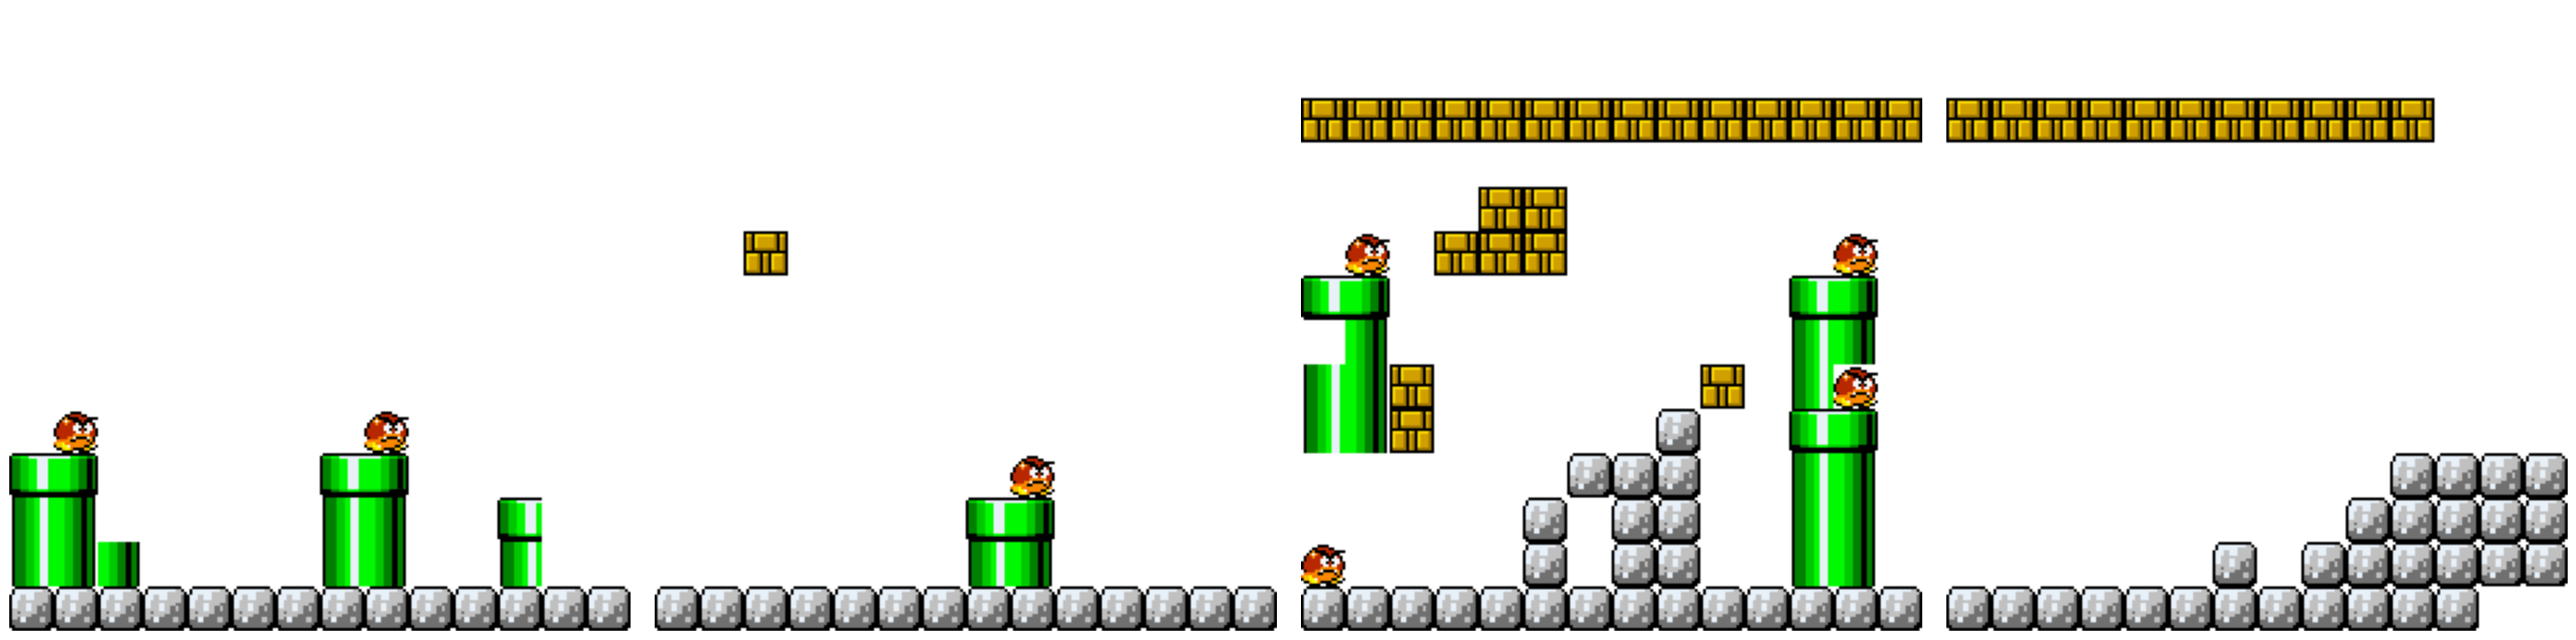

In [161]:
# Sampling random zs
NUMBER_OF_LEVELS = 4
zs = 2.5 * torch.randn((NUMBER_OF_LEVELS, z_dim))
levels = vae.decode(zs)
level_1 = levels[0]
target = torch.argmax(level_1, dim=0)
#print(target)

level_imgs = [plot_decoded_level(level) for level in levels]
# Plotting
_, axes = plt.subplots(1, len(levels), figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [147]:
'''mul = 0.2
variations = 10

z = [z + mul*torch.randn(variations) for z in range(100)]
level2 = levels[1]
target2 = torch.argmax(level2, dim=0)
target2'''

#tmp = (target == target2).int()
#tmp
import random

from torch import Tensor
'''
mul = 0.2

def generate_levels_from_target_Old(target):
    new_levels = [target + mul*torch.randn(14) for z in range(10)]
    return new_levels


def generate_levels_from_target(target, n):
    new_levels = []
    for i in range(n):
        level = target + mul * (random.random() - 0.5)
        new_levels.append(level)
        
    #new_levels = [target + mul*torch.randn(14) for z in range(10)]
    return new_levels

def generate_points(n, mean, std):
    points = []
    for i in range(n):
       p = ((((random.random() - 0.5)*std) + mean[0], ((random.random() -0.5)*std) + mean[1]))
       points.append(p)
    return points

def search_levels_for_objects(levels, search_type, amount):
    total_of_type = 0
    foundLevels = []
    for level in levels:
        LevelToSearch= torch.argmax(level, dim=0)
        total_of_type = 0
        for i in LevelToSearch:
            for j in i:
                if j == search_type:
                    total_of_type += 1
                    if total_of_type >= amount:
                        foundLevels.append(level)
                        total_of_type = 0
                        break
                
    return foundLevels
'''



def generate_new_levels(inputLevel, target, n, exploration_Rate):
    LEVELSIZE = 14
    inputAsArray = Tensor.detach(inputLevel).numpy()
    targetAsArray = Tensor.detach(target).numpy()
    newLevels = []
    for i in range(n):
        newLevel = []
        for i in range(LEVELSIZE):
            col = []
            for j in range(LEVELSIZE):
                col.append(0)
            newLevel.append(col)
        for row in range(LEVELSIZE):
            for col in range(LEVELSIZE):
                if inputLevel[row][col] == target[row][col]:
                    newLevel[row][col] = inputLevel[row][col]
                else:
                    if random.random() < exploration_Rate:
                        newLevel[row][col] = (random.randint(1,9))
                    else:
                        newLevel[row][col] = (inputLevel[row][col])
        newLevel = Tensor(newLevel)
        newLevel = newLevel.type(torch.int64)
        newLevels.append(newLevel)
    return newLevels




def eval_level(target, lvl):
    tmp = (target == lvl).int()
    total = 0
    count = 0
    for i in tmp:
        for j in i:
            if j == 1:
                total += 1
            count +=1
    return total

def find_best_level(target, levels):
    bestLevelIndex = -1000
    bestLevelScore = -1000
    for i in range(len(levels)):
        LevelScore = eval_level(target, levels[i])
        if LevelScore >= bestLevelScore:
            bestLevelIndex = i
            bestLevelScore = LevelScore
    return bestLevelIndex, bestLevelScore


def evolve_levels(target, evolutions):
    explorationRate = 1.0
    explorationDecay = 0.995
    
    startLevel = torch.zeros(14,14)

    startLevelScore = eval_level(target, startLevel)

    for i in range(evolutions):
        newLevels = generate_new_levels(startLevel, target, 100, explorationRate)
        BestLevelIndex, bestScore = find_best_level(target, newLevels)
        print(startLevelScore, bestScore, BestLevelIndex, explorationRate)
        if(bestScore >= startLevelScore):
            startLevel = newLevels[BestLevelIndex]
            startLevelScore = bestScore
        explorationRate *= explorationDecay
    
        if startLevelScore >= 195:
            return startLevel

bestLevel = evolve_levels(target, 1000)

print (bestLevel)
print (target)


tmp = (target == bestLevel).int()
print (tmp)

finalLevels = []
finalLevels.append(target)
finalLevels.append(bestLevel)
print(finalLevels)


14 43 88 1.0
43 71 92 0.995
71 95 27 0.990025
95 115 84 0.985074875
115 132 6 0.9801495006250001
132 146 7 0.9752487531218751
146 158 66 0.9703725093562657
158 166 95 0.9655206468094844
166 174 79 0.960693043575437
174 180 58 0.9558895783575597
180 187 99 0.9511101304657719
187 190 92 0.946354579813443
190 193 88 0.9416228069143757
193 195 98 0.9369146928798039
tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 1, 2, 2, 4, 4, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 4],
        [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 

In [160]:

#listOfZeros = [int(0)] * 14


from ctypes.wintypes import tagRECT

from torch import tensor


startLevel = []
for i in range(14):
    col = []
    for j in range(14):
        col.append(0)
    startLevel.append(col)

newstart = torch.zeros(14,14)

#print(target)
for i, row in enumerate(target):
    #print(row)
    for col in enumerate(row):
        #print(col)
        #print(target[row][col])
        #print(target[row,col])
        pass
n=1
levelSize = 14
Testlevels = []
for i in range(n):
    newLevel = []
    for i in range(levelSize):
        col = []
        for j in range(levelSize):
            col.append(0)
        newLevel.append(col)
    for row in range(levelSize):
        for col in range(levelSize):
            newLevel[col][row] = col+1
    Testlevels.append(newLevel)

#print(Testlevels)

print(levels)


tensor([[[[-2.6579e+01, -2.6440e+01, -2.4789e+01,  ..., -2.6856e+01,
           -2.6927e+01, -2.6392e+01],
          [-3.7607e+01, -3.0775e+01, -3.6606e+01,  ..., -3.3996e+01,
           -3.2569e+01, -3.7635e+01],
          [-2.7551e+01, -2.6611e+01, -2.6531e+01,  ..., -2.4617e+01,
           -2.5389e+01, -2.2947e+01],
          ...,
          [-1.9469e+01, -2.1467e+01, -7.8589e+00,  ..., -6.1109e+00,
           -1.0324e+01, -6.6663e+00],
          [-2.5116e+01, -1.0538e+01, -5.5876e+00,  ..., -4.8604e+00,
           -5.5447e+00, -4.4379e+00],
          [-8.6368e-04, -1.5253e-04, -1.7576e-05,  ..., -2.9255e-02,
           -2.5149e-01, -2.5070e-01]],

         [[-2.6584e+01, -2.6842e+01, -2.5567e+01,  ..., -2.8164e+01,
           -2.7665e+01, -2.6563e+01],
          [-3.1060e+01, -2.6875e+01, -3.0105e+01,  ..., -3.1872e+01,
           -3.1056e+01, -3.2332e+01],
          [-3.9959e-03, -5.4818e-03, -4.5504e-03,  ..., -1.4203e-02,
           -8.2371e-02, -3.4255e-01],
          ...,
     

In [156]:
# Getting levels from them using the decoder
levels = vae.decode(zs)

# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]

TypeError: linear(): argument 'input' (position 1) must be Tensor, not list

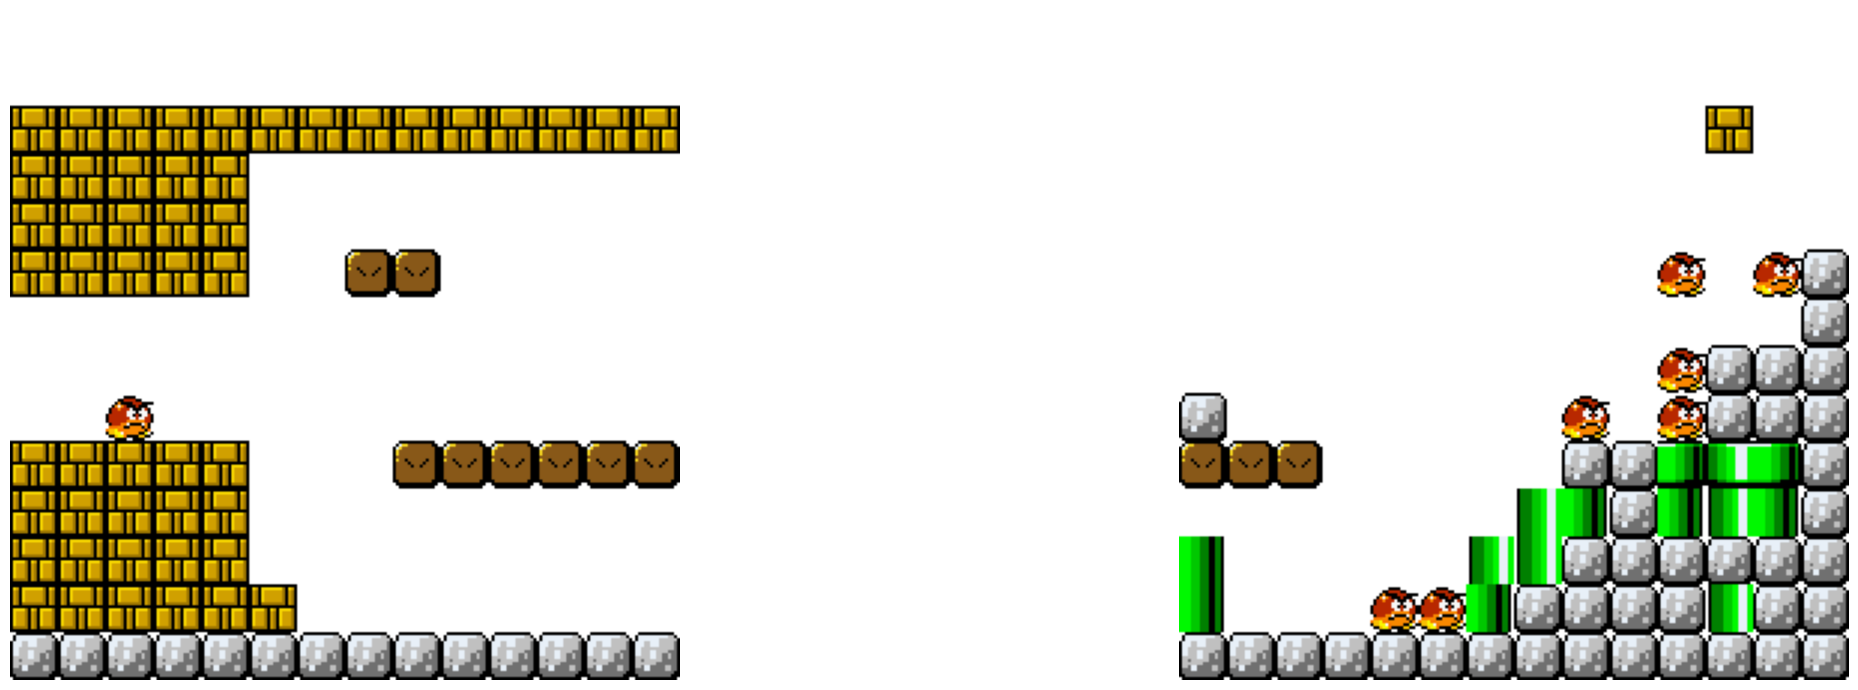

In [157]:
# Plotting
_, axes = plt.subplots(1, len(finalLevels), figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)